In [822]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# Load your dataset
data = pd.read_csv('df_list_stock.csv')
data = data.set_index('ticker')
print(data.columns)

Index(['market', 'date_pulling', 'industry', 'sector', 'enterpriseValue',
       'totalCashPerShare', 'profitMargins', 'priceToBook', 'debtToEquity',
       'returnOnEquity', 'currentRatio', 'trailingEps',
       'Total Non Current Assets', 'Working Capital', 'Operating Income',
       'ttm_latest', 'Free Cash Flow', 'avg_MF_ROC', 'avg_growth', 'beta',
       'price_current', 'price_past', 'MF_EarningYield', 'current_MF_ROC',
       'FCF_Yield', 'PE_offset_Cash', 'PE', 'PEG', 'PriceIndex_6m',
       'percenFCFpersharetoprice'],
      dtype='object')


In [823]:
print(data.describe())
### Here, we can see there are some crazy ouliers. We might have to deal with it first ### 

       enterpriseValue  totalCashPerShare  profitMargins  priceToBook  \
count     3.920000e+02         392.000000     392.000000   392.000000   
mean      1.331731e+11           8.023403       0.130365     9.193842   
std       3.908521e+11          12.680864       0.119191    22.696358   
min       7.846374e+09           0.021000      -0.437710     0.429803   
25%       2.325582e+10           1.709250       0.071522     2.130945   
50%       4.403636e+10           4.439000       0.121175     3.941442   
75%       9.418226e+10           9.817000       0.178015     7.815113   
max       3.645256e+12         161.084000       0.739020   328.969060   

       debtToEquity  returnOnEquity  currentRatio  trailingEps  \
count    392.000000      392.000000    392.000000   392.000000   
mean     130.352043        0.265029      1.721926     5.893648   
std      176.193744        0.471460      1.568305     6.881159   
min        0.693000       -0.759690      0.081000   -28.080000   
25%       41

In [824]:
data = data.loc[(data['PE'] > 0) & (data['PE']<50)]
data = data.loc[(data['PEG'] > 0) & (data['PEG']<5)]
data = data.loc[(data['avg_growth'] > 0)]
print(data.describe())

       enterpriseValue  totalCashPerShare  profitMargins  priceToBook  \
count     1.910000e+02         191.000000     191.000000   191.000000   
mean      1.405724e+11           7.753885       0.159000     6.869221   
std       4.278596e+11          13.589966       0.106416     8.677455   
min       9.911526e+09           0.050000      -0.030030     0.748535   
25%       2.489069e+10           1.511000       0.095155     2.197895   
50%       4.826474e+10           4.110000       0.136670     4.265593   
75%       9.089558e+10           9.028000       0.197220     8.851347   
max       3.553897e+12         161.084000       0.739020    69.194390   

       debtToEquity  returnOnEquity  currentRatio  trailingEps  \
count    191.000000      191.000000    191.000000   191.000000   
mean     125.819712        0.270253      1.619403     7.468639   
std      148.443361        0.244605      1.465360     6.508847   
min        1.437000       -0.009440      0.081000     0.490000   
25%       45

In [825]:
data_features = data.drop(columns=['trailingEps','enterpriseValue','Total Non Current Assets','Working Capital','Operating Income','Free Cash Flow','totalCashPerShare','ttm_latest','price_current','price_past'])

data_features = data_features.drop(columns=['market','date_pulling', 'industry', 'sector','PriceIndex_6m'])

print(data_features.columns)

Index(['profitMargins', 'priceToBook', 'debtToEquity', 'returnOnEquity',
       'currentRatio', 'avg_MF_ROC', 'avg_growth', 'beta', 'MF_EarningYield',
       'current_MF_ROC', 'FCF_Yield', 'PE_offset_Cash', 'PE', 'PEG',
       'percenFCFpersharetoprice'],
      dtype='object')


In [826]:
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_features)


# Convert back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_features.columns)

print(scaled_df.describe())

       profitMargins   priceToBook  debtToEquity  returnOnEquity  \
count   1.910000e+02  1.910000e+02  1.910000e+02    1.910000e+02   
mean   -1.674054e-16  1.860060e-17 -8.370268e-17    7.440238e-17   
std     1.002628e+00  1.002628e+00  1.002628e+00    1.002628e+00   
min    -1.780995e+00 -7.072088e-01 -8.401157e-01   -1.146452e+00   
25%    -6.015302e-01 -5.397439e-01 -5.444302e-01   -6.516652e-01   
50%    -2.103853e-01 -3.008337e-01 -3.097966e-01   -2.640668e-01   
75%     3.601032e-01  2.290229e-01  2.780655e-01    2.302071e-01   
max     5.464820e+00  7.201301e+00  7.529971e+00    6.171108e+00   

       currentRatio    avg_MF_ROC    avg_growth          beta  \
count  1.910000e+02  1.910000e+02  1.910000e+02  1.910000e+02   
mean  -2.139068e-16 -2.883092e-16  8.137760e-18  1.092785e-16   
std    1.002628e+00  1.002628e+00  1.002628e+00  1.002628e+00   
min   -1.052606e+00 -2.274845e+00 -5.621008e-01 -2.359895e+00   
25%   -4.573347e-01 -7.485086e-01 -4.087707e-01 -6.706920e-01 

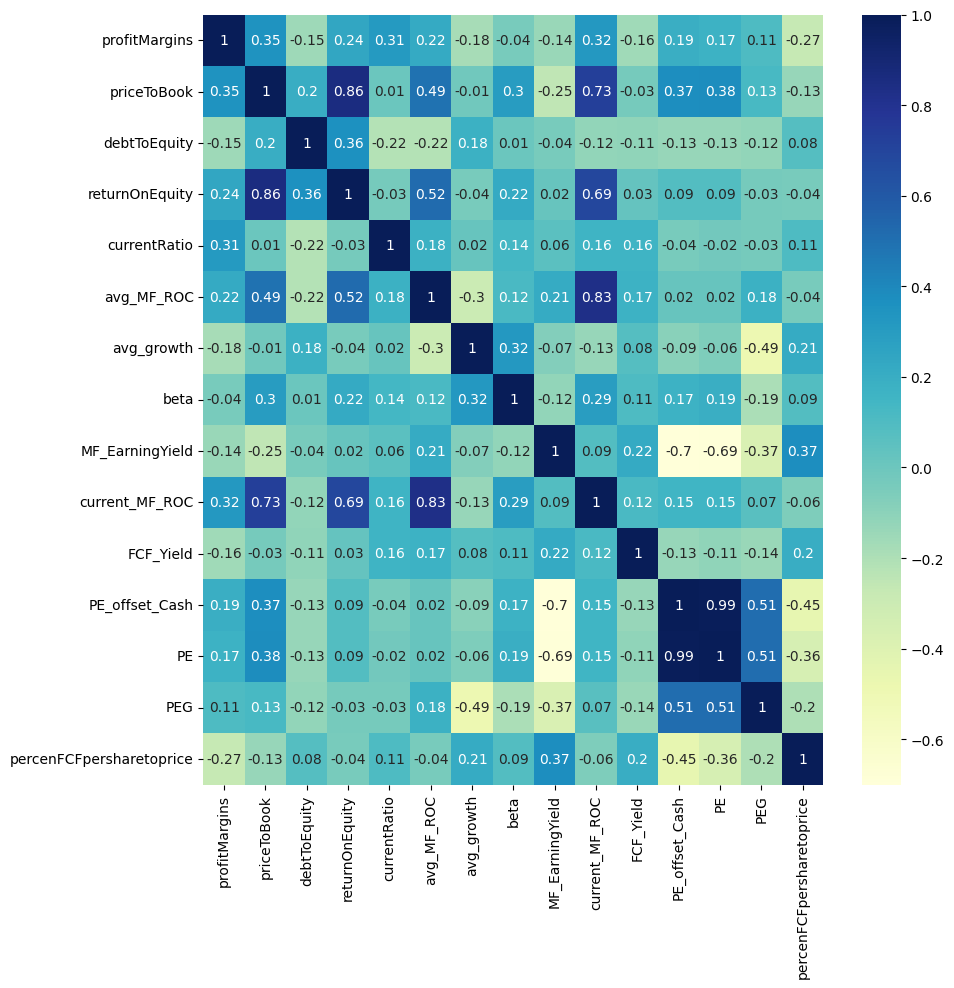

In [827]:
# Plotting correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))

dataplot = sns.heatmap(round(scaled_df.corr(numeric_only=True),2), cmap="YlGnBu", annot=True,ax = ax )

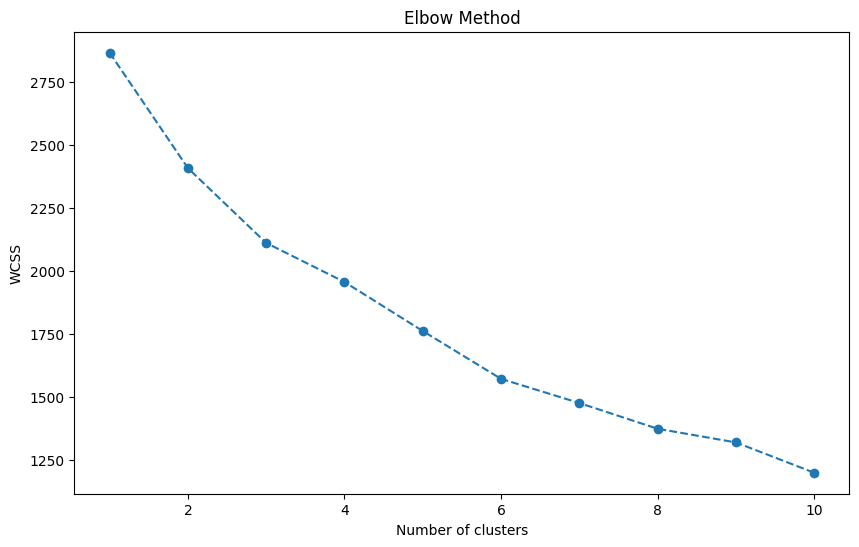

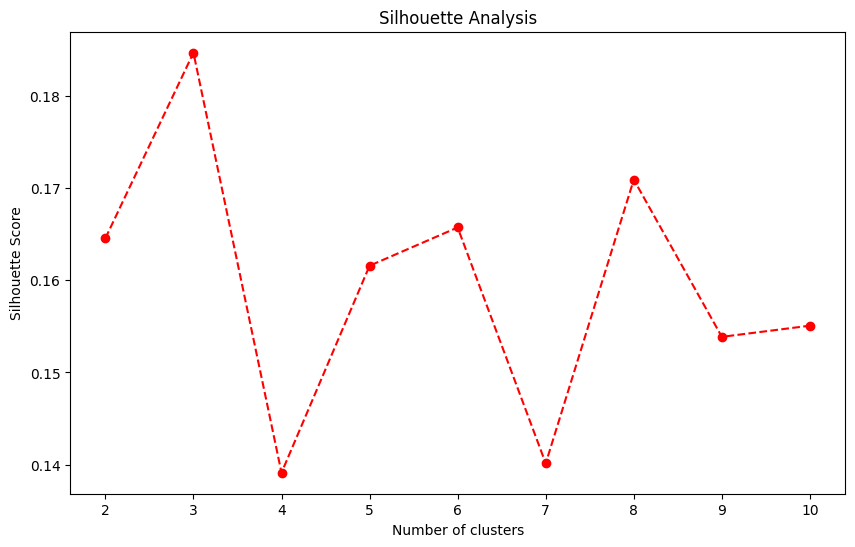

In [828]:
# Generate synthetic data

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state= 1)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# plt.savefig('elbow_method.png')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters,random_state=1)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
# plt.savefig('silhouette_analysis.png')
plt.show()

Index(['market', 'date_pulling', 'industry', 'sector', 'enterpriseValue',
       'totalCashPerShare', 'profitMargins', 'priceToBook', 'debtToEquity',
       'returnOnEquity', 'currentRatio', 'trailingEps',
       'Total Non Current Assets', 'Working Capital', 'Operating Income',
       'ttm_latest', 'Free Cash Flow', 'avg_MF_ROC', 'avg_growth', 'beta',
       'price_current', 'price_past', 'MF_EarningYield', 'current_MF_ROC',
       'FCF_Yield', 'PE_offset_Cash', 'PE', 'PEG', 'PriceIndex_6m',
       'percenFCFpersharetoprice'],
      dtype='object')


/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/2571862329.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper right')


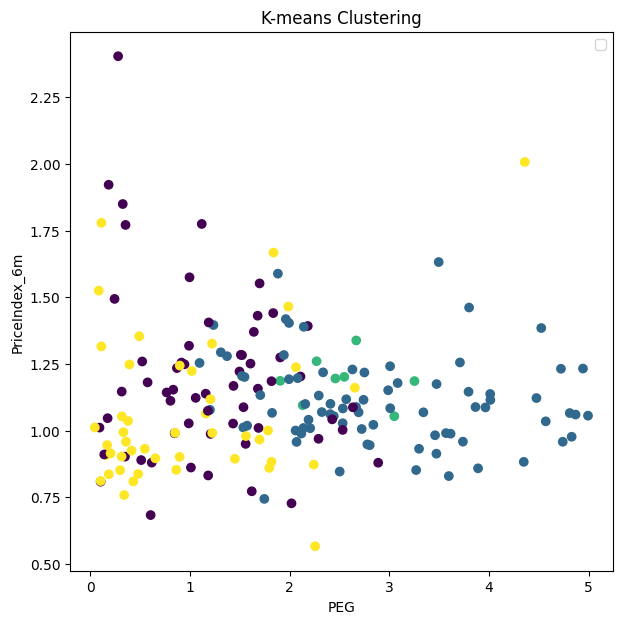

In [829]:
# K-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters,random_state = 1)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Plotting the clusters
fig, ax1 = plt.subplots(1, 1, figsize=(7, 7))

print(data.columns)
yax = "PriceIndex_6m"
xax = "PEG"

# K-means plot
ax1.scatter(data[xax], data[yax], c=kmeans_labels, cmap='viridis')
ax1.set_title('K-means Clustering')
ax1.set_xlabel(xax)
ax1.set_ylabel(yax)
ax1.legend(loc='upper right')


plt.show()

In [830]:
data['clusterno_kmeans'] = kmeans_labels
print(data['clusterno_kmeans'].value_counts().sort_index())

clusterno_kmeans
0    59
1    79
2     8
3    45
Name: count, dtype: int64


/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


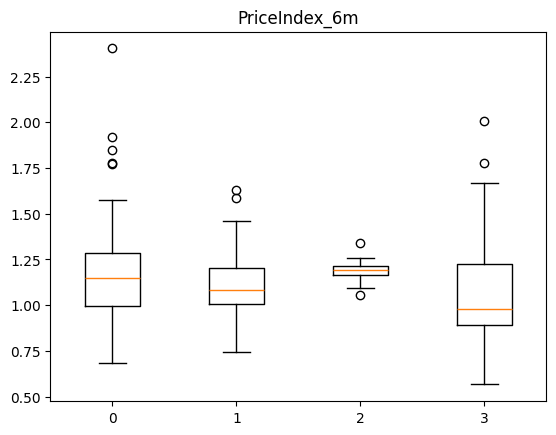

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


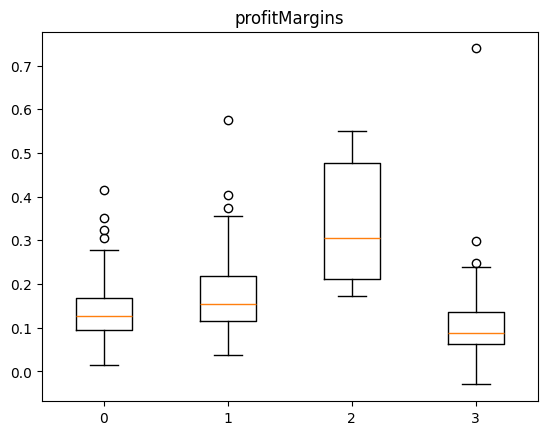

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


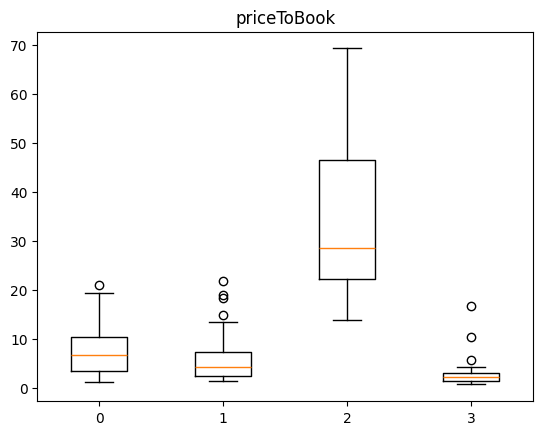

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


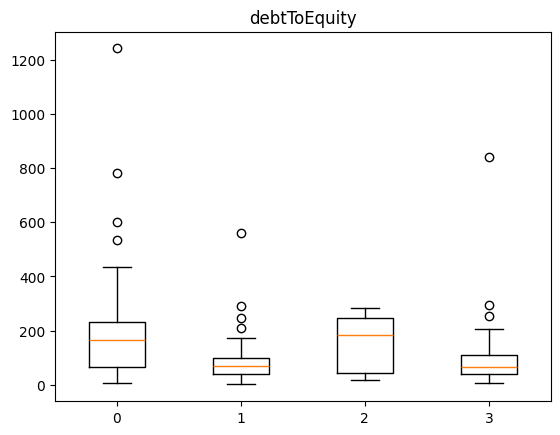

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


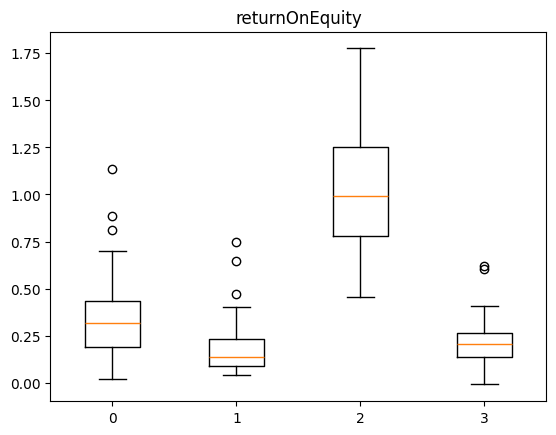

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


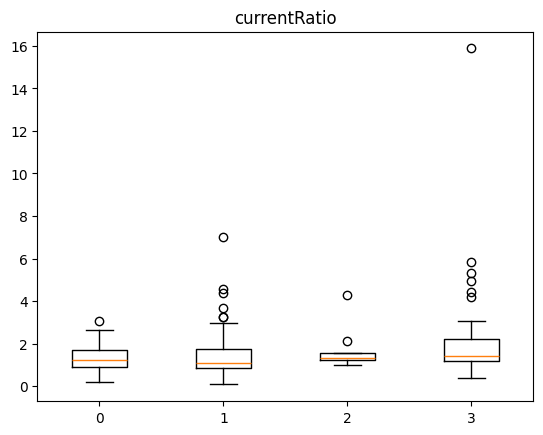

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


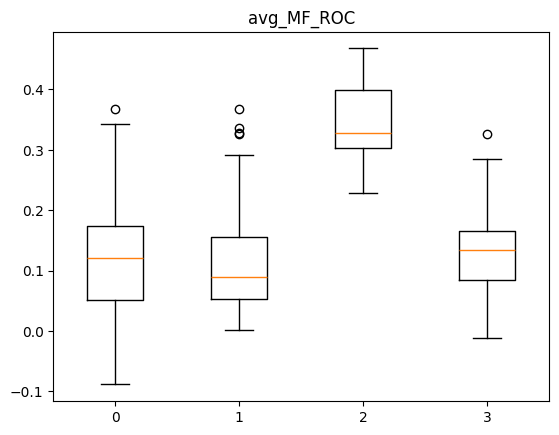

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


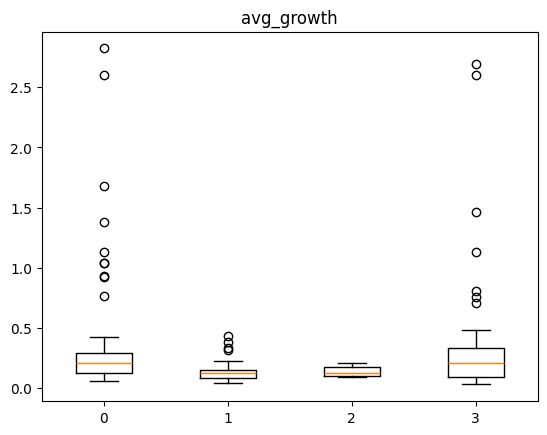

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


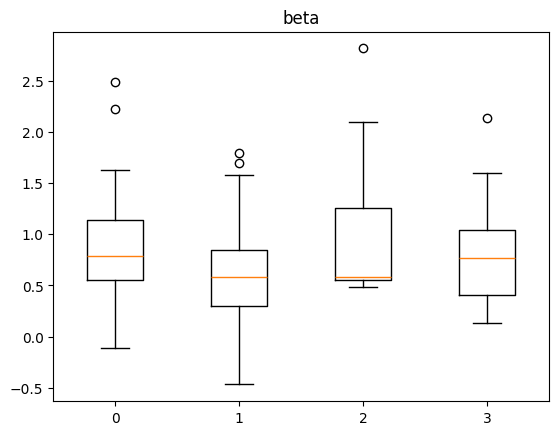

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


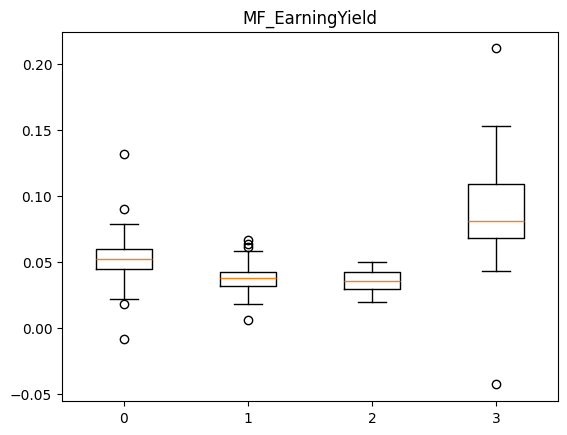

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


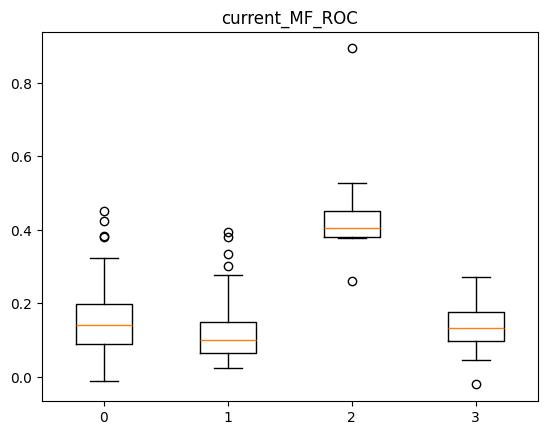

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


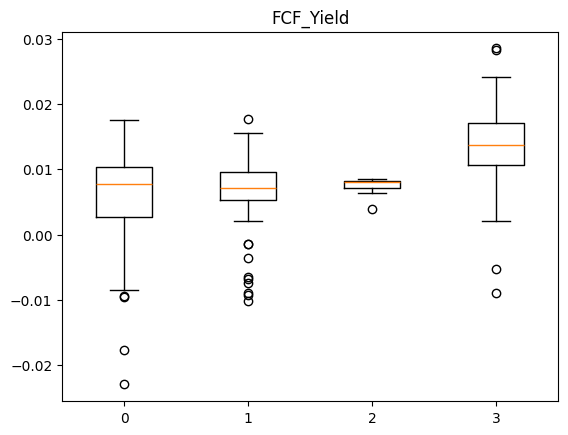

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


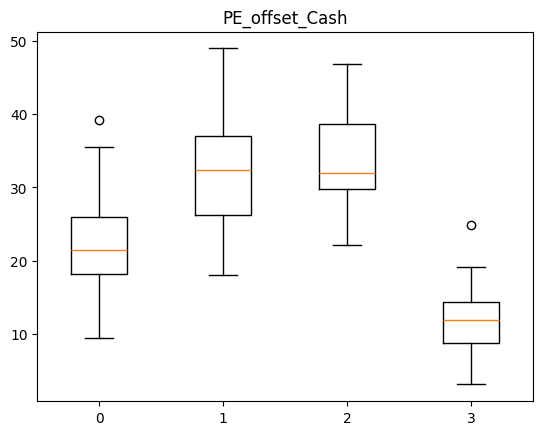

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


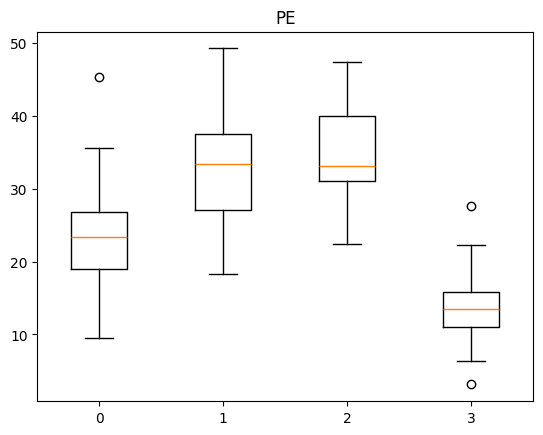

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


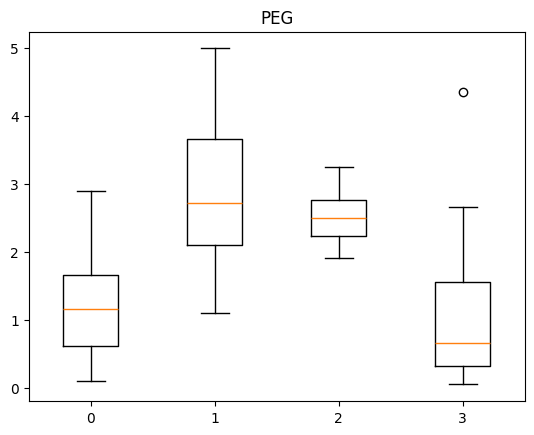

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_4525/1449814220.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])


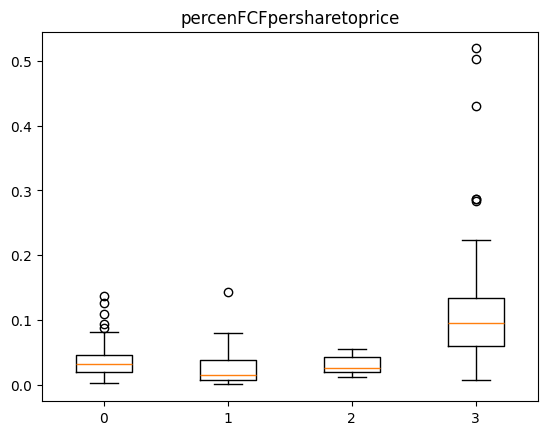

In [831]:
indicator = 'PriceIndex_6m'
bpdata = []
for i in [i for i in range(n_clusters)]:
    bpdata.append(data[indicator].loc[data['clusterno_kmeans'] == i])
plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])
plt.title(indicator)
plt.show()

for j in list(data_features.columns) :
    bpdata = []
    for i in [i for i in range(n_clusters)]:
        bpdata.append(data[j].loc[data['clusterno_kmeans'] == i])
    plt.boxplot(bpdata, positions=[i for i in range(n_clusters)], labels=[i for i in range(n_clusters)])
    plt.title(j)
    plt.show()


In [832]:
g = 2
print(data[['PriceIndex_6m','current_MF_ROC','MF_EarningYield']].loc[data['clusterno_kmeans'] == g].sort_values('PriceIndex_6m',ascending=False))

        PriceIndex_6m  current_MF_ROC  MF_EarningYield
ticker                                                
V            1.338077        0.388108         0.037640
MA           1.260154        0.527369         0.030919
PAYX         1.201621        0.424151         0.045922
NVDA         1.195506        0.893127         0.019988
IT           1.186592        0.261271         0.026510
ADP          1.185866        0.419835         0.033098
ITW          1.095356        0.376976         0.050292
KLAC         1.054249        0.381669         0.040848


In [835]:
data.loc['V']

market                                      US
date_pulling                        2025-02-03
industry                       Credit Services
sector                      Financial Services
enterpriseValue                 647509377024.0
totalCashPerShare                        8.124
profitMargins                          0.54955
priceToBook                          21.705437
debtToEquity                            53.239
returnOnEquity                         0.50708
currentRatio                             1.283
trailingEps                               9.91
Total Non Current Assets         59266000000.0
Working Capital                   3531000000.0
Operating Income                 24372000000.0
ttm_latest                          2024-12-31
Free Cash Flow                    5099250000.0
avg_MF_ROC                              0.3047
avg_growth                             0.12927
beta                                  0.483452
price_current                       341.799988
price_past   